# **Well Location Data Plotting**

In [1]:
from welly import Location
from welly import Well
import pandas as pd


In [2]:
data = Well.from_las('../Data/inputs/WellyData/L05-15-Spliced.las')

In [4]:
data 

Well(uwi: '', name: 'L5-15', 26 curves: ['BHT', 'CAL', 'CHT', 'CN', 'CNC', 'CNCQH', 'CNQH', 'DEPTH', 'GR', 'MBVI', 'MBVM', 'MCBW', 'MPHE', 'MPHS', 'MPRM', 'PEQH', 'PORZ', 'PORZC', 'TEN', 'TTEN', 'WTBH', 'ZCORQH', 'ZDEN', 'ZDENQH', 'ZDNC', 'ZDNCQH'])

In [5]:
data.data

{'BHT': Curve(mnemonic=BHT, units=DEGC, start=2772.7500, stop=2907.6250, step=0.1250, count=[931]),
 'CAL': Curve(mnemonic=CAL, units=IN, start=2772.7500, stop=2907.6250, step=0.1250, count=[918]),
 'CHT': Curve(mnemonic=CHT, units=LBF, start=2772.7500, stop=2907.6250, step=0.1250, count=[925]),
 'CN': Curve(mnemonic=CN, units=PU, start=2772.7500, stop=2907.6250, step=0.1250, count=[921]),
 'CNC': Curve(mnemonic=CNC, units=PU, start=2772.7500, stop=2907.6250, step=0.1250, count=[894]),
 'CNCQH': Curve(mnemonic=CNCQH, units=PU, start=2772.7500, stop=2907.6250, step=0.1250, count=[898]),
 'CNQH': Curve(mnemonic=CNQH, units=PU, start=2772.7500, stop=2907.6250, step=0.1250, count=[926]),
 'DEPTH': Curve(mnemonic=DEPTH, units=M, start=2772.7500, stop=2907.6250, step=0.1250, count=[931]),
 'GR': Curve(mnemonic=GR, units=GAPI, start=2772.7500, stop=2907.6250, step=0.1250, count=[923]),
 'MBVI': Curve(mnemonic=MBVI, units=PU, start=2772.7500, stop=2907.6250, step=0.1250, count=[864]),
 'MBVM':

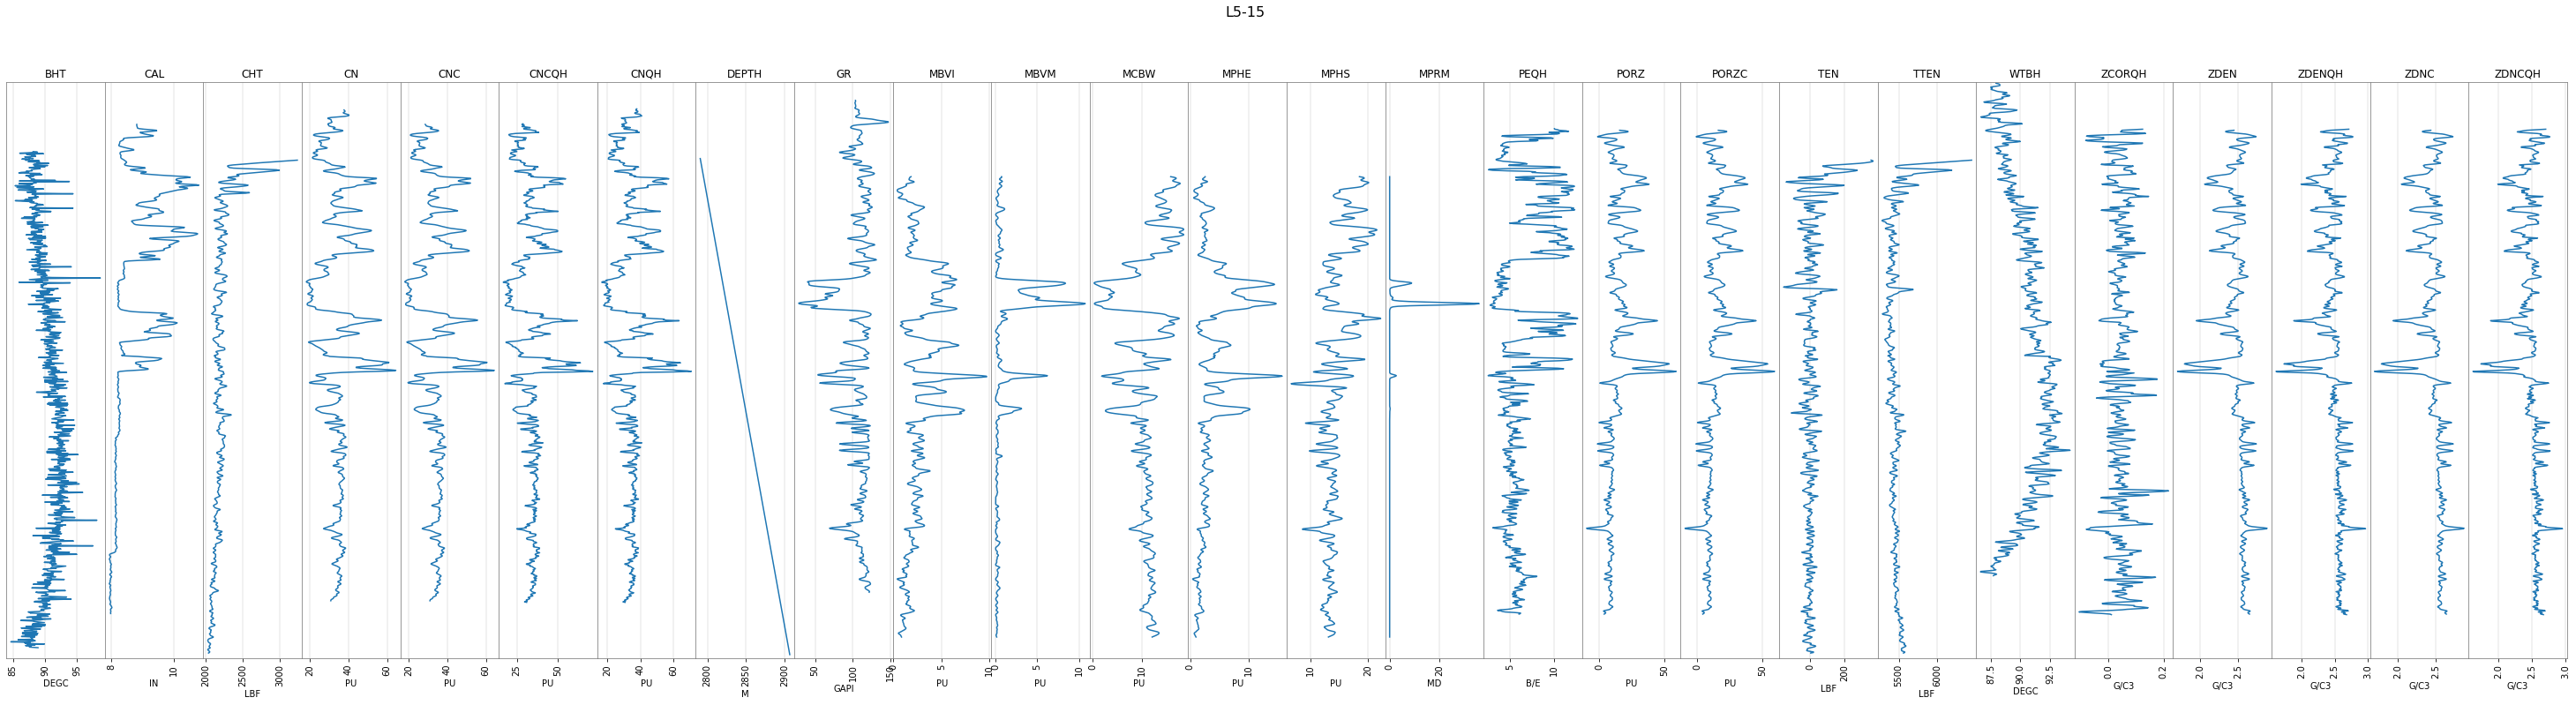

In [6]:
data.plot(extents='curves')

## **Importing Survey data**
Survey data is commonly measured at irregular intervals during the drilling process. It gives a snapshot of the measured depth, inclination and azimuth at the time of the survey. From this, we can calculate the True Vertical Depth, x-offset and y-offset from the origin point of the well.

In [7]:
survey = pd.read_csv('../Data/inputs/WellyData/L05-15-Survey.csv')

In [8]:
survey

,MD,INC,AZI,TVD,X-offset,Y-offset
0,0.00,0.00,0.00,0.00,0.00,0.00
1,89.30,0.00,0.00,89.30,0.00,0.00
2,142.10,2.31,323.48,142.09,-0.63,0.86
3,170.20,3.89,319.12,170.14,-1.59,2.03
4,197.90,5.86,315.60,197.74,-3.20,3.75
...,...,...,...,...,...,...
107,3121.82,22.52,202.44,3013.36,-271.20,-620.33
108,3149.93,23.35,203.30,3039.24,-275.46,-630.42
109,3178.92,23.82,204.05,3065.81,-280.12,-641.04
110,3192.32,24.12,204.96,3078.06,-282.38,-646.00


Welly requires the survey data to contain MD - means measured Depth, INc - inclination and AZi - Azimuth.

This allows the welly module to calculate TVD, X-offset and Y-offset.\
We can subset the data by using the square brackets and passing in alist of the column names.

In [9]:
survey_subset = survey[['MD', 'INC', 'AZI']]

In [10]:
survey_subset

,MD,INC,AZI
0,0.00,0.00,0.00
1,89.30,0.00,0.00
2,142.10,2.31,323.48
3,170.20,3.89,319.12
4,197.90,5.86,315.60
...,...,...,...
107,3121.82,22.52,202.44
108,3149.93,23.35,203.30
109,3178.92,23.82,204.05
110,3192.32,24.12,204.96


## Adding Survey Data to Welly
After the survey data has been loaded from a CSV file, we need to calculate our location parameters. By default welly is set to calculate these using the minimum curvature method, which is the most accurate method for this purpose.

In [11]:
# add deviation data to a wwll
data.location.add_deviation(survey_subset.values)

Noww that the survey data has been loaded in, and attached to the well, we can call upon data.location.position to view the data.
The data formatted as X-offset, Y-offset and TVD.

In [12]:
# view first five rows of the data
data.location.position[:5]

array([[  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  89.3       ],
       [ -0.6333253 ,   0.8552655 , 142.08569704],
       [ -1.59422229,   2.03112298, 170.14372544],
       [ -3.19869524,   3.75201703, 197.74222054]])

We can extract each of the location parameters into variables by slicing up the array. This is done using square brackets and selecting ALL ROWS USING THE COLLON FOLLOWED BY THE COLUMN WITHIN THE ARRAY.

In [15]:
x_loc = data.location.position[:,0]
y_loc = data.location.position[:,1]
z_loc = data.location.position[:,2]


In [16]:
z_loc

array([   0.        ,   89.3       ,  142.08569704,  170.14372544,
        197.74222054,  225.68858529,  254.17872844,  282.83986178,
        311.3294853 ,  339.82739229,  368.42706739,  396.92691062,
        425.62638313,  454.22551155,  482.42473573,  511.12342097,
        539.72042719,  568.21483874,  597.00539705,  625.8900492 ,
        654.36614119,  683.22656973,  711.6691264 ,  740.00649462,
        767.54748074,  797.06893638,  825.36408467,  853.83548556,
        882.30553194,  910.5784206 ,  939.03148052,  967.35658945,
        995.56380403, 1023.95695144, 1052.22740711, 1080.54668678,
       1108.68959153, 1136.6589388 , 1164.87003188, 1192.91335907,
       1220.78632672, 1248.71483434, 1276.69724251, 1304.38501765,
       1332.02759325, 1359.48829109, 1386.59399864, 1413.47807554,
       1440.51055639, 1467.37758752, 1494.27990524, 1521.15255355,
       1547.94826077, 1574.81148851, 1601.67556214, 1628.46190115,
       1655.38744119, 1682.77094459, 1709.94467279, 1737.02953

In [17]:
data.location.tvd

array([   0.        ,   89.3       ,  142.08569704,  170.14372544,
        197.74222054,  225.68858529,  254.17872844,  282.83986178,
        311.3294853 ,  339.82739229,  368.42706739,  396.92691062,
        425.62638313,  454.22551155,  482.42473573,  511.12342097,
        539.72042719,  568.21483874,  597.00539705,  625.8900492 ,
        654.36614119,  683.22656973,  711.6691264 ,  740.00649462,
        767.54748074,  797.06893638,  825.36408467,  853.83548556,
        882.30553194,  910.5784206 ,  939.03148052,  967.35658945,
        995.56380403, 1023.95695144, 1052.22740711, 1080.54668678,
       1108.68959153, 1136.6589388 , 1164.87003188, 1192.91335907,
       1220.78632672, 1248.71483434, 1276.69724251, 1304.38501765,
       1332.02759325, 1359.48829109, 1386.59399864, 1413.47807554,
       1440.51055639, 1467.37758752, 1494.27990524, 1521.15255355,
       1547.94826077, 1574.81148851, 1601.67556214, 1628.46190115,
       1655.38744119, 1682.77094459, 1709.94467279, 1737.02953

## Creating Location Plots

To understand the position of the well, we can call upon three plots.\
The first plots the x and y offset and gives a topdown view/map view of the well path.\
The next two plots show us how the well changes in the x location versus TVD and the y location versus TVD.

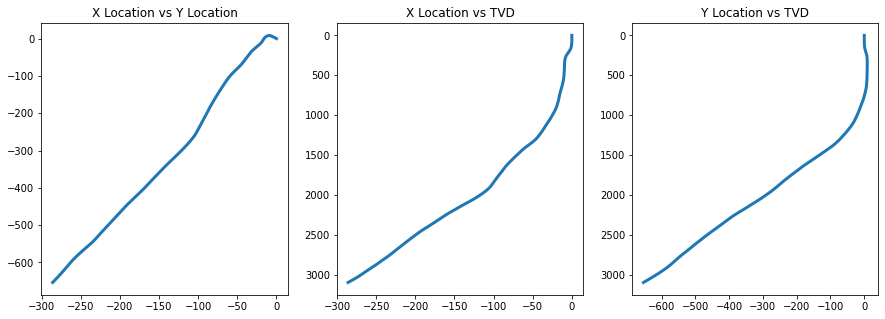

In [19]:
import matplotlib.pyplot as plt

fig ,ax = plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))

ax1.plot(x_loc,y_loc, lw=3)
ax1.set_title('X Location vs Y Location')

ax2.plot(x_loc,z_loc, lw=3)
ax2.set_title('X Location vs TVD')
ax2.invert_yaxis()

ax3.plot(y_loc,z_loc, lw=3)
ax3.set_title('Y Location vs TVD')
ax3.invert_yaxis()

### Add Markers for start of the well and End of the well

We can add a couple of markers to our plot to show the starting location (black square) and the end location as red star of the well.

Additionally, for the plots with TVD, we can understand them better if we invert the y-axis using ax.invert_yaxis()

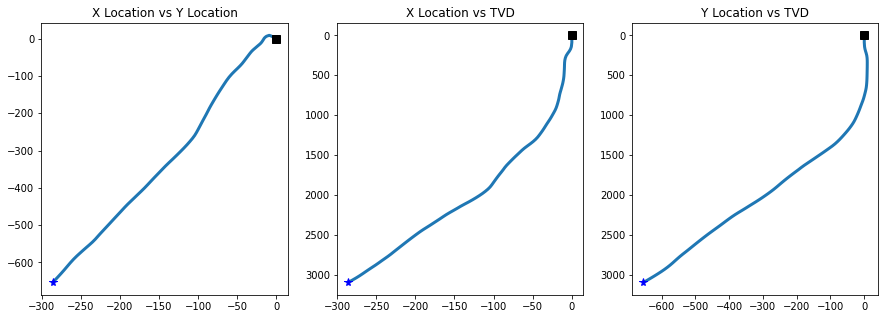

In [20]:
import matplotlib.pyplot as plt

fig ,ax = plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))
# X_loc vs Y_loc
ax1.plot(x_loc,y_loc, lw=3)
ax1.plot(x_loc[0],y_loc[0], marker='s', color ='black',ms=8)
ax1.plot(x_loc[-1],y_loc[-1], marker='*', color ='blue',ms=8)
ax1.set_title('X Location vs Y Location')

# X_loc vs TVD
ax2.plot(x_loc,z_loc, lw=3)
ax2.set_title('X Location vs TVD')
ax2.plot(x_loc[0],z_loc[0], marker='s', color ='black',ms=8)
ax2.plot(x_loc[-1],z_loc[-1], marker='*', color ='blue',ms=8)


ax2.invert_yaxis()



# X_loc vs TVD
ax3.plot(y_loc,z_loc, lw=3)
ax3.set_title('Y Location vs TVD')
ax3.plot(y_loc[0],z_loc[0], marker='s', color ='black',ms=8)
ax3.plot(y_loc[-1],z_loc[-1], marker='*', color ='blue',ms=8)

ax3.invert_yaxis()


## Compare Against the original Survey
We are fortunate enough to have a survey file that contains the location parameters and TVD, so we can do a quick check with what welly has calculated and the ones contained within CSV file.

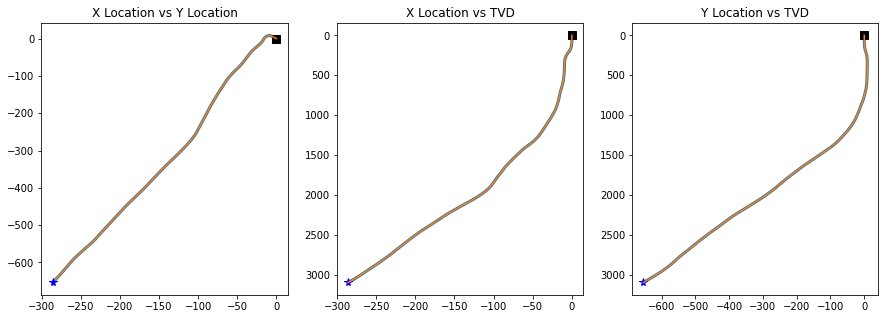

In [22]:
fig ,ax = plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))
# X_loc vs Y_loc
ax1.plot(x_loc,y_loc, lw=3)
ax1.plot(x_loc[0],y_loc[0], marker='s', color ='black',ms=8)
ax1.plot(survey['X-offset'], survey['Y-offset'])
ax1.plot(x_loc[-1],y_loc[-1], marker='*', color ='blue',ms=8)
ax1.set_title('X Location vs Y Location')

# X_loc vs TVD
ax2.plot(x_loc,z_loc, lw=3)
ax2.set_title('X Location vs TVD')
ax2.plot(x_loc[0],z_loc[0], marker='s', color ='black',ms=8)
ax2.plot(x_loc[-1],z_loc[-1], marker='*', color ='blue',ms=8)
ax2.plot(survey['X-offset'], survey['TVD'])

ax2.invert_yaxis()



# X_loc vs TVD
ax3.plot(y_loc,z_loc, lw=3)
ax3.set_title('Y Location vs TVD')
ax3.plot(y_loc[0],z_loc[0], marker='s', color ='black',ms=8)

ax3.plot(y_loc[-1],z_loc[-1], marker='*', color ='blue',ms=8)
ax3.plot(survey['Y-offset'], survey['TVD'])
ax3.invert_yaxis()

## **Creating 3D Well Path plot**
Rather than viewing the data in two dimensions, we can view it in three dimentions using matplotlib. But first we have to calculate continuous data. this is done by using location.trajectory(). How we can provide a datum. i.e. the UTM co-ordinates of the well location at surface, an a vertical offset

In [23]:
# Creating a trajectory of regularly sampled points
location_data = data.location.trajectory(datum=[589075.56,5963534.91,47.5], elev=False)

In [24]:
xs = location_data[:,0]
ys = location_data[:,1]
zs = location_data[:,2]

In [25]:
zs

array([  47.52654446,   50.75387201,   53.98038627,   57.20610207,
         60.43103429,   63.65519779,   66.87860743,   70.10127807,
         73.32322456,   76.54446177,   79.76500457,   82.98486781,
         86.20406634,   89.42261505,   92.64052877,   95.85782238,
         99.07451074,  102.2906087 ,  105.50613112,  108.72109288,
        111.93550882,  115.14939381,  118.36276272,  121.57563039,
        124.78801169,  127.99992149,  131.21137464,  134.422386  ,
        137.63297043,  140.8431428 ,  144.05291797,  147.26231079,
        150.47133613,  153.68000885,  156.88834381,  160.09635587,
        163.30405988,  166.51147072,  169.71860324,  172.9254723 ,
        176.13209277,  179.3384795 ,  182.54464735,  185.75061119,
        188.95638588,  192.16198627,  195.36742723,  198.57272362,
        201.7778903 ,  204.98294213,  208.18789397,  211.39276068,
        214.59755713,  217.80229816,  221.00699865,  224.21167346,
        227.41633744,  230.62100546,  233.82569237,  237.03041

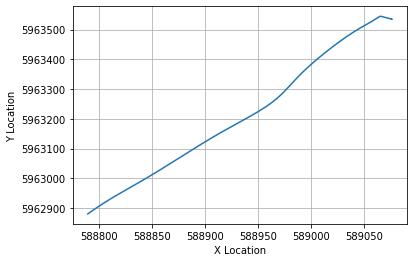

In [26]:
plt.plot(xs,ys)
plt.xlabel('X Location')
plt.ylabel('Y Location')
plt.ticklabel_format(style='plain')
plt.grid()

In [27]:
from mpl_toolkits.mplot3d import Axes3D

In [30]:
# enable 3d plotting
%matplotlib widget

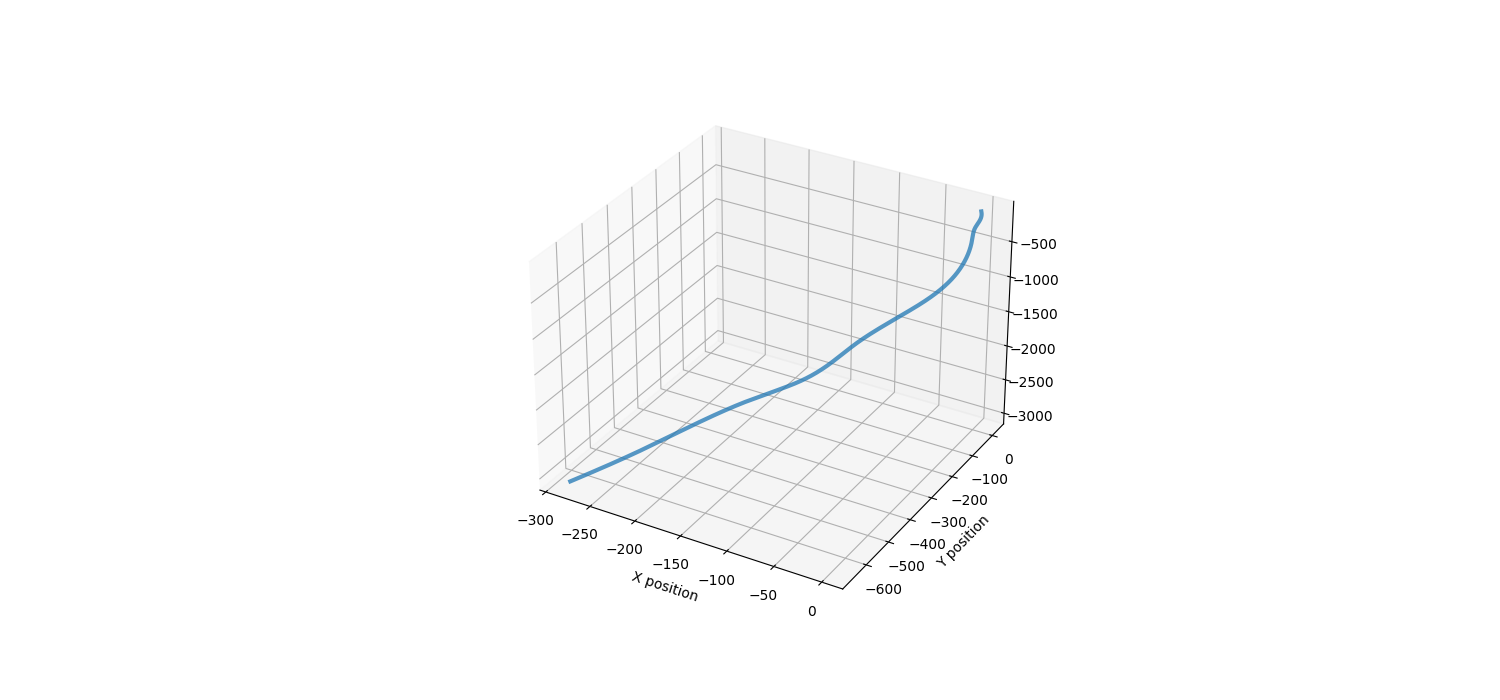

In [31]:
data.location.plot_3d()

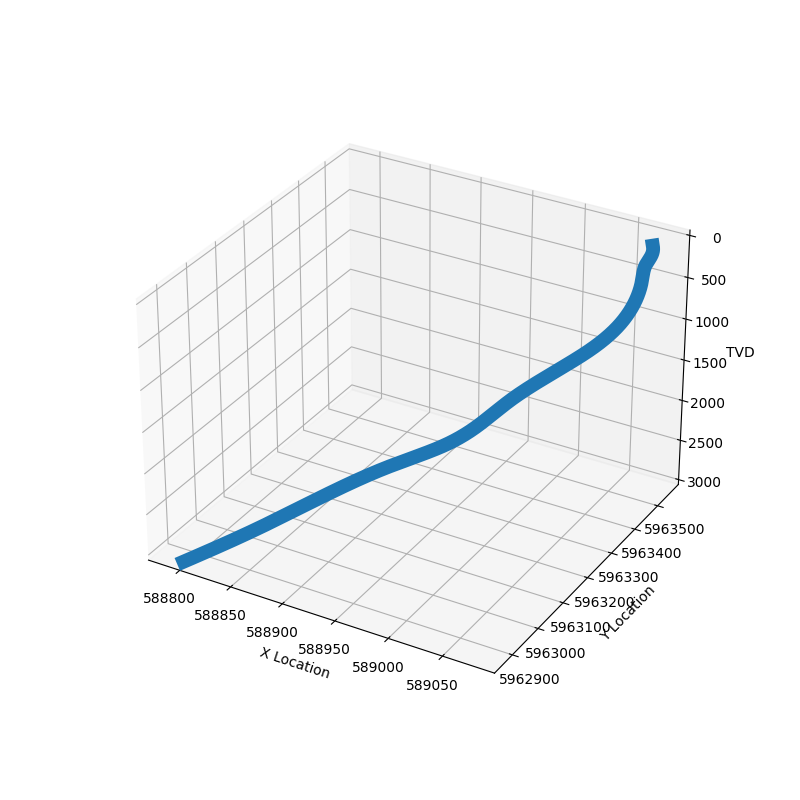

In [34]:
# 3d custom plot

fig = plt.figure(figsize=(8,8))

ax = plt.axes(projection = '3d')
ax.plot3D(xs,ys,zs, lw=10)
ax.set_zlim(3000,0)



ax.set_xlabel('X Location')
ax.set_ylabel('Y Location')
ax.set_zlabel('TVD')

plt.ticklabel_format(style='plain')
plt.show()


## Summary
Here We have seen how to plot well location data and calculate TVD using welly and also how we can plot a 3D well plot using matplotlib.pyplot.

**Author:**\
Dilshad Raza\
07/28/2022